# Anti-Spam Email Classification
## 1. Initialize Spark Session

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("ExampleApp") \
        .getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/11/27 16:14:51 WARN Utils: Your hostname, epsilon403, resolves to a loopback address: 127.0.1.1; using 192.168.9.23 instead (on interface wlp2s0f0)
25/11/27 16:14:51 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/27 16:14:52 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## 2. Load Dataset

In [2]:
df = spark.read.csv("DataSet_Emails.csv", 
                    header=True, 
                    inferSchema=True, 
                    multiLine=True,  
                    escape='"'      
                    )
print("Dataset loaded successfully!")
df.show(5, truncate=50)

Dataset loaded successfully!
+---+----------+--------------------------------------------------+-----+----------+--------------------------------------------------+--------------------------------------------------+----------+
|_c0|message_id|                                              text|label|label_text|                                           subject|                                           message|      date|
+---+----------+--------------------------------------------------+-----+----------+--------------------------------------------------+--------------------------------------------------+----------+
|  0|     33214|any software just for 15 $ - 99 $ understanding...|    1|      spam|                 any software just for 15 $ - 99 $|understanding oem software\nlead me not into te...|2005-06-18|
|  1|     11929|perspective on ferc regulatory action client co...|    0|       ham|perspective on ferc regulatory action client co...|19 th , 2 : 00 pm edt\nperspective on ferc r

25/11/27 16:14:59 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/folder_0/sprint_3/Anti-Spam-Intelligent/DataSet_Emails.csv


## 3. Examine Dataset Structure
Display schema, dataset size, and sample data.

In [3]:
print("=" * 60)
print("DATASET STRUCTURE")
print("=" * 60)

print("\nColumn Types:")
df.printSchema()

print(f"\nTotal rows: {df.count()}")
print(f"Total columns: {len(df.columns)}")

print("\nSample emails:")
df.show(3, truncate=100)

DATASET STRUCTURE

Column Types:
root
 |-- _c0: integer (nullable = true)
 |-- message_id: integer (nullable = true)
 |-- text: string (nullable = true)
 |-- label: integer (nullable = true)
 |-- label_text: string (nullable = true)
 |-- subject: string (nullable = true)
 |-- message: string (nullable = true)
 |-- date: date (nullable = true)



25/11/27 16:14:59 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/folder_0/sprint_3/Anti-Spam-Intelligent/DataSet_Emails.csv



Total rows: 31716
Total columns: 8

Sample emails:
+---+----------+----------------------------------------------------------------------------------------------------+-----+----------+---------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+----------+
|_c0|message_id|                                                                                                text|label|label_text|                                                              subject|                                                                                             message|      date|
+---+----------+----------------------------------------------------------------------------------------------------+-----+----------+---------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+---------

25/11/27 16:15:00 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/folder_0/sprint_3/Anti-Spam-Intelligent/DataSet_Emails.csv


## 4. Detect and Handle Missing Values
Analyze missing values in each column and remove rows with null values.

In [4]:
from pyspark.sql.functions import col , udf

print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)

for column in df.columns:
    null_count = df.filter(col(column).isNull()).count()
    print(f"{column}: {null_count} missing values")

df_clean = df.dropna()
print(f"\nRows after removing missing values: {df_clean.count()}")

MISSING VALUES ANALYSIS


25/11/27 16:15:01 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/folder_0/sprint_3/Anti-Spam-Intelligent/DataSet_Emails.csv


_c0: 0 missing values


25/11/27 16:15:01 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/folder_0/sprint_3/Anti-Spam-Intelligent/DataSet_Emails.csv


message_id: 0 missing values


25/11/27 16:15:02 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/folder_0/sprint_3/Anti-Spam-Intelligent/DataSet_Emails.csv


text: 51 missing values


25/11/27 16:15:02 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/folder_0/sprint_3/Anti-Spam-Intelligent/DataSet_Emails.csv


label: 0 missing values


25/11/27 16:15:03 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/folder_0/sprint_3/Anti-Spam-Intelligent/DataSet_Emails.csv


label_text: 0 missing values


25/11/27 16:15:03 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/folder_0/sprint_3/Anti-Spam-Intelligent/DataSet_Emails.csv


subject: 274 missing values


25/11/27 16:15:04 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/folder_0/sprint_3/Anti-Spam-Intelligent/DataSet_Emails.csv


message: 345 missing values


25/11/27 16:15:04 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/folder_0/sprint_3/Anti-Spam-Intelligent/DataSet_Emails.csv


date: 0 missing values


25/11/27 16:15:05 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/folder_0/sprint_3/Anti-Spam-Intelligent/DataSet_Emails.csv



Rows after removing missing values: 31148


## 5. Detect and Handle Duplicates
Identify duplicate rows and remove them from the dataset.

In [5]:
print("=" * 60)
print("DUPLICATES ANALYSIS")
print("=" * 60)

total_rows = df_clean.count()
distinct_rows = df_clean.distinct().count()
duplicates = total_rows - distinct_rows

print(f"Total rows: {total_rows}")
print(f"Distinct rows: {distinct_rows}")
print(f"Duplicates: {duplicates}")

df_clean = df_clean.dropDuplicates()
print(f"\nRows after removing duplicates: {df_clean.count()}")

df.columns

DUPLICATES ANALYSIS


25/11/27 16:15:06 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/folder_0/sprint_3/Anti-Spam-Intelligent/DataSet_Emails.csv
25/11/27 16:15:06 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/folder_0/sprint_3/Anti-Spam-Intelligent/DataSet_Emails.csv
25/11/27 16:15:08 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/

Total rows: 31148
Distinct rows: 31148
Duplicates: 0



Rows after removing duplicates: 31148


['_c0',
 'message_id',
 'text',
 'label',
 'label_text',
 'subject',
 'message',
 'date']

## 6. Analyze Class Distribution
Check the balance between spam and ham emails to identify potential class imbalance.

In [6]:
print("=" * 60)
print("CLASS DISTRIBUTION ANALYSIS")
print("=" * 60)

spam_count = df_clean.filter(col('label_text') == "spam").count()
ham_count = df_clean.filter(col('label_text') == "ham").count()
total = df_clean.count()

print(f"\nSpam emails: {spam_count} ({spam_count/total*100:.2f}%)")
print(f"Ham emails: {ham_count} ({ham_count/total*100:.2f}%)")
print(f"Total emails: {total}")

if spam_count > ham_count:
    ratio = spam_count / ham_count
else:
    ratio = ham_count / spam_count
    
print(f"\nClass imbalance ratio: 1:{ratio:.2f}")
if ratio > 2:
    print("⚠ Dataset is imbalanced - consider using techniques like SMOTE or class weights")

CLASS DISTRIBUTION ANALYSIS


25/11/27 16:15:10 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/folder_0/sprint_3/Anti-Spam-Intelligent/DataSet_Emails.csv
25/11/27 16:15:11 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/folder_0/sprint_3/Anti-Spam-Intelligent/DataSet_Emails.csv
25/11/27 16:15:12 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/


Spam emails: 15645 (50.23%)
Ham emails: 15503 (49.77%)
Total emails: 31148

Class imbalance ratio: 1:1.01


## 7. Collect Text Data by Class
Gather all spam and ham text for further analysis.

In [7]:
from pyspark.sql.functions import lower, regexp_replace, concat_ws

text_column = [col for col in df_clean.columns if col != 'label_text'][0]

spam_text = df_clean.filter(col('label_text') == 'spam').select(text_column).rdd.map(lambda x: x[0]).collect()
spam_text_combined = ' '.join([str(text) for text in spam_text if text])

ham_text = df_clean.filter(col('label_text') == 'ham').select(text_column).rdd.map(lambda x: x[0]).collect()
ham_text_combined = ' '.join([str(text) for text in ham_text if text])

print(f"Spam text collected: {len(spam_text_combined)} characters")
print(f"Ham text collected: {len(ham_text_combined)} characters")

25/11/27 16:15:14 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/folder_0/sprint_3/Anti-Spam-Intelligent/DataSet_Emails.csv
25/11/27 16:15:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/folder_0/sprint_3/Anti-Spam-Intelligent/DataSet_Emails.csv


Spam text collected: 88474 characters
Ham text collected: 87469 characters


## 8. Text Preprocessing Setup (Initial Attempt)
First attempt at setting up text preprocessing with NLTK and lemmatization.

In [8]:
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

normalize_word = WordNetLemmatizer()

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

def preprocess_text(text):
    text = text.lower()
    text = regexp_replace(text, r'http\S+|www\S+|https\S+', 'url')
    text = regexp_replace(text, r'\d+', 'number')
    text = regexp_replace(text, r'[^\w\s]', '')
    text = text.lower()
    
    stop_words = set(stopwords.words("english"))

    tokens = word_tokenize(text)

    normalized_word = [normalize_word.lemmatize(token) for token in tokens if token not in stop_words]
    
    return normalize_word

vectorize = TfidfVectorizer(tokenizer=preprocess_text, token_pattern=None)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/epsilon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/epsilon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/epsilon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/epsilon/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## 9. Create UDF for Text Preprocessing
Apply the preprocessing function as a user-defined function in PySpark.

In [9]:
from pyspark.sql.types import ArrayType, StringType

clean_udf = udf(preprocess_text, ArrayType(StringType()))
new_df = df_clean.withColumn("tokens", clean_udf(col("text")))

## 10. Text Preprocessing (Improved Implementation)
Enhanced text preprocessing with proper handling of null values and combined text fields.

In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from pyspark.sql.functions import udf, col, concat_ws, coalesce, lit
from pyspark.sql.types import ArrayType, StringType
import re

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    if text is None or text == "":
        return []
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', 'url', text)
    text = re.sub(r'\d+', 'number', text)
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    normalized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token.strip()]
    return normalized_tokens

clean_udf = udf(preprocess_text, ArrayType(StringType()))

cleaned_df = df_clean.withColumn(
    "all_text",
    concat_ws(" ", coalesce(col("text"), lit("")), coalesce(col("subject"), lit("")), coalesce(col("message"), lit("")))
).withColumn("tokens", clean_udf(col("all_text"))).select("label", "label_text", "tokens")

cleaned_df.show(5, truncate=False)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/epsilon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/epsilon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/epsilon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/epsilon/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/epsilon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
25/11/27 16:15:19 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/folder_0/sprint_3/Anti-Spam-Intelligent/DataSet_Emails.

+-----+----------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 11. Generate Word Clouds
Visualize the most frequent words in spam and ham emails using word clouds.

WORDCLOUD GENERATION


25/11/27 16:15:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/folder_0/sprint_3/Anti-Spam-Intelligent/DataSet_Emails.csv
25/11/27 16:15:34 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/folder_0/sprint_3/Anti-Spam-Intelligent/DataSet_Emails.csv



Spam tokens collected: 4463082
Ham tokens collected: 5520584

Top 10 spam words: [('number', 371740), ('_', 109334), ('company', 26494), ('com', 21794), ('e', 18296), ('u', 17304), ('http', 16532), ('email', 16096), ('information', 14808), ('please', 13812)]
Top 10 ham words: [('number', 607354), ('enron', 113422), ('ect', 66102), ('hou', 31658), ('company', 27422), ('please', 24622), ('com', 23644), ('would', 23442), ('subject', 22852), ('_', 22058)]


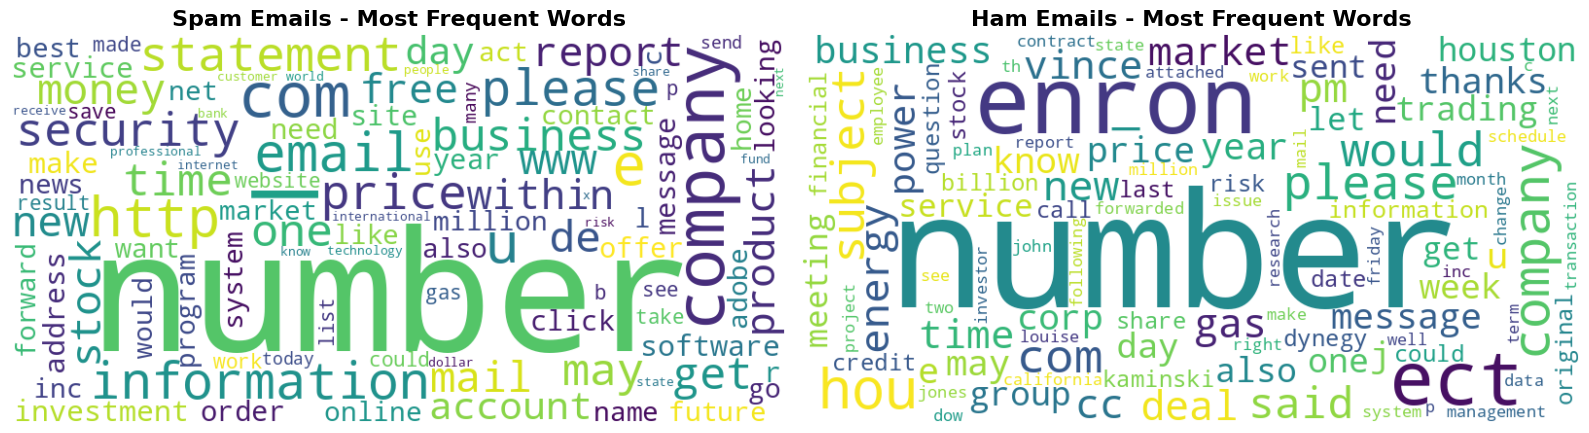


✓ WordClouds saved as 'spam_wordcloud.png' and 'ham_wordcloud.png'


In [11]:
import sys
import subprocess

try:
    from wordcloud import WordCloud
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "wordcloud"])
    from wordcloud import WordCloud

from collections import Counter
import matplotlib.pyplot as plt

print("=" * 60)
print("WORDCLOUD GENERATION")
print("=" * 60)

spam_tokens = (cleaned_df.filter(col("label_text") == "spam")
               .select("tokens")
               .rdd.flatMap(lambda r: r[0] if r[0] else [])
               .collect())

ham_tokens = (cleaned_df.filter(col("label_text") == "ham")
              .select("tokens")
              .rdd.flatMap(lambda r: r[0] if r[0] else [])
              .collect())

print(f"\nSpam tokens collected: {len(spam_tokens)}")
print(f"Ham tokens collected: {len(ham_tokens)}")

spam_freq = Counter(spam_tokens)
ham_freq = Counter(ham_tokens)

print(f"\nTop 10 spam words: {spam_freq.most_common(10)}")
print(f"Top 10 ham words: {ham_freq.most_common(10)}")

wc_params = dict(
    width=800, 
    height=400, 
    background_color="white", 
    collocations=False,
    max_words=100
)

spam_wc = WordCloud(**wc_params).generate_from_frequencies(spam_freq)
ham_wc = WordCloud(**wc_params).generate_from_frequencies(ham_freq)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Spam Emails - Most Frequent Words", fontsize=16, fontweight='bold')

plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Ham Emails - Most Frequent Words", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

spam_wc.to_file("spam_wordcloud.png")
ham_wc.to_file("ham_wordcloud.png")
print("\n✓ WordClouds saved as 'spam_wordcloud.png' and 'ham_wordcloud.png'")

## 12. Check DataFrame Columns
Display available columns in the processed dataframe.

In [12]:
new_df.columns

['_c0',
 'message_id',
 'text',
 'label',
 'label_text',
 'subject',
 'message',
 'date',
 'tokens']

## 13. Text Vectorization
Convert processed text into numerical features using TF-IDF and Count Vectorizer.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from pyspark.sql.functions import concat_ws

print("=" * 60)
print("TEXT VECTORIZATION")
print("=" * 60)

texts_for_vectorization = cleaned_df.select(
    concat_ws(" ", col("tokens")).alias("processed_text"),
    "label"
).toPandas()

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(texts_for_vectorization['processed_text'])
print(f"\nTF-IDF Matrix shape: {X_tfidf.shape}")
print(f"Number of features: {len(tfidf_vectorizer.get_feature_names_out())}")

count_vectorizer = CountVectorizer(max_features=5000)
X_count = count_vectorizer.fit_transform(texts_for_vectorization['processed_text'])
print(f"\nCount Matrix shape: {X_count.shape}")
print(f"Number of features: {len(count_vectorizer.get_feature_names_out())}")

y = texts_for_vectorization['label'].values

print("\n✓ Vectorization completed!")

TEXT VECTORIZATION


25/11/27 16:15:45 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , message_id, text, label, label_text, subject, message, date
 Schema: _c0, message_id, text, label, label_text, subject, message, date
Expected: _c0 but found: 
CSV file: file:///home/epsilon/Desktop/folder_0/sprint_3/Anti-Spam-Intelligent/DataSet_Emails.csv



TF-IDF Matrix shape: (31148, 5000)
Number of features: 5000

Count Matrix shape: (31148, 5000)
Number of features: 5000

✓ Vectorization completed!


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

model = SVC()



print("\nTraining model...")
model.fit(X_train, y_train)


predictions = model.predict(X_test)


print("\n" + "="*30)
print("MODEL EVALUATION")
print("="*30)
print(f"Accuracy: {accuracy_score(y_test, predictions):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Training shape: (24918, 5000)
Testing shape: (6230, 5000)

Training model...

MODEL EVALUATION
Accuracy: 0.9918

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3135
           1       0.99      0.99      0.99      3095

    accuracy                           0.99      6230
   macro avg       0.99      0.99      0.99      6230
weighted avg       0.99      0.99      0.99      6230



25/11/27 19:59:21 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 9056353 ms exceeds timeout 120000 ms
25/11/27 19:59:21 WARN SparkContext: Killing executors is not supported by current scheduler.
25/11/27 19:59:28 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:53)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:342)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:132)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$